In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage import exposure
import os
import numpy as np
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans




In [2]:
# Path to the root folder of your dataset
dataset_path = 'C:\\Me__ee\\ai course\\image\\data set image\\Font\\font2'

# List all subdirectories (assuming each subdirectory corresponds to a class)
class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
features_list=[]



# Loop through each class folder
for class_folder in class_folders:
    class_name = os.path.basename(class_folder)

    # Loop through each image in the class folder
    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        # Load the image
        image = io.imread(image_path)

        # Extract HOG features and visualize
        

        # Display the original image and the HOG features
      

        # Append HOG features to the features list
       
        features_list.append(image)

        # Append the label to the labels list
   


In [4]:
features_list=np.array(features_list)
data=features_list.reshape(len(features_list),-1)

data.shape

(10160, 16384)

In [5]:
n_clusters = 10  # Number of clusters (0 through 9 digits)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data)

C:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

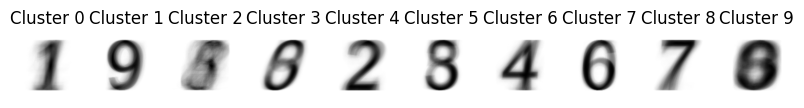

In [12]:
# Visualize the cluster centers (representative images)
fig, ax = plt.subplots(1, n_clusters, figsize=(10, 3))

for i in range(n_clusters):
    center_image = kmeans.cluster_centers_[i].reshape(128, 128)  # Reshape to original dimensions
    ax[i].imshow(center_image, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()

In [13]:
from sklearn.metrics import silhouette_score
preds = kmeans.fit_predict(data)
score = silhouette_score(data, preds, metric='euclidean')

C:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.100


In [33]:
inertia = kmeans.inertia_

In [34]:
print(inertia)

649631492943.4468


In [18]:
sse = []
for i in range(1,13):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data)
    sse.append(kmeans2.inertia_)

C:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

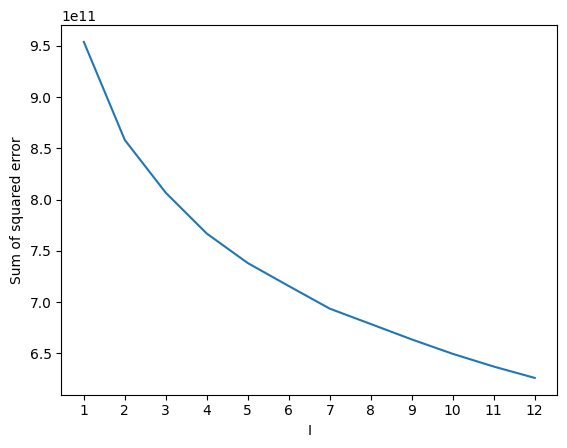

In [19]:
plt.xlabel('I')
plt.ylabel('Sum of squared error')
plt.xticks(range(1,13))
plt.plot(range(1,13),sse)

In [25]:
silhouette_scores = []
for i in range(2, 13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    preds = kmeans.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, preds))



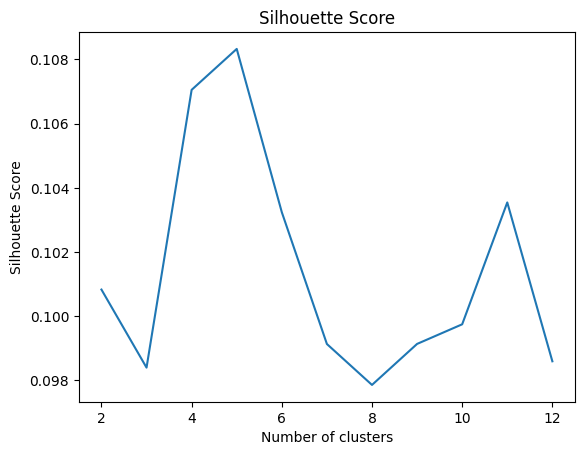

In [26]:
plt.plot(range(2, 13), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()